<a href="https://colab.research.google.com/github/Himanshu-Barange/Deep-Learning-Projects/blob/main/Alzeihmer's_Detection_Using_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
darwin = fetch_ucirepo(id=732)

# data (as pandas dataframes)
X = darwin.data.features
y = darwin.data.targets

# metadata
print(darwin.metadata)

# variable information
print(darwin.variables)


{'uci_id': 732, 'name': 'DARWIN', 'repository_url': 'https://archive.ics.uci.edu/dataset/732/darwin', 'data_url': 'https://archive.ics.uci.edu/static/public/732/data.csv', 'abstract': 'The DARWIN dataset includes handwriting data from 174 participants. The classification task consists in distinguishing Alzheimer’s disease patients from healthy people.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 174, 'num_features': 451, 'feature_types': [], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2022, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C55D0K', 'creators': ['Francesco Fontanella'], 'intro_paper': {'title': 'Diagnosing Alzheimer’s disease from on-line handwriting: A novel dataset and performance benchmarking', 'authors': 'Nicole D. Cilia, Giuseppe De Gregorio , Claudio De Stefano, Francesco Fontanella, 

In [4]:
X.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,249.729085,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,77.258394,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,193.667018,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,163.065803,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,147.094679,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575


In [5]:
y.head()

,class
0,P
1,P
2,P
3,P
4,P


In [6]:
y.squeeze(axis = 1).unique()

array(['P', 'H'], dtype=object)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 451 entries, ID to total_time25
dtypes: float64(300), int64(150), object(1)
memory usage: 613.2+ KB


In [8]:
X.ID.unique()

array(['id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8',
       'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15',
       'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
       'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'id_39', 'id_40', 'id_41', 'id_42', 'id_43',
       'id_44', 'id_45', 'id_46', 'id_47', 'id_48', 'id_49', 'id_50',
       'id_51', 'id_52', 'id_53', 'id_54', 'id_55', 'id_56', 'id_57',
       'id_58', 'id_59', 'id_60', 'id_61', 'id_62', 'id_63', 'id_64',
       'id_65', 'id_66', 'id_67', 'id_68', 'id_69', 'id_70', 'id_71',
       'id_72', 'id_73', 'id_74', 'id_75', 'id_76', 'id_77', 'id_78',
       'id_79', 'id_80', 'id_81', 'id_82', 'id_83', 'id_84', 'id_85',
       'id_86', 'id_87', 'id_88', 'id_89', 'id_90', 'id_91', 'id_92',
       'id_93', 'id_94', 'id_95', 'id_96', 'id_97', 'id_98', 'id_99',
       'id_100', 'id

In [9]:
X = X.drop('ID', axis=1)

In [10]:
from sklearn.preprocessing import LabelEncoder, RobustScaler

In [11]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

encoder = LabelEncoder()
y = encoder.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
rf = RandomForestClassifier(random_state = 36).fit(x_train, y_train)
predictions = rf.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8857142857142857
[[14  1]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.94      0.85      0.89        20

    accuracy                           0.89        35
   macro avg       0.88      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35



In [17]:
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions = gbc.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8857142857142857
[[14  1]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.94      0.85      0.89        20

    accuracy                           0.89        35
   macro avg       0.88      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35



In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
regressor = LogisticRegression().fit(x_train, y_train)
predictions = regressor.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8285714285714286
[[13  2]
 [ 4 16]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.89      0.80      0.84        20

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.84      0.83      0.83        35



In [21]:
from sklearn.ensemble import ExtraTreesClassifier

In [22]:
xtree = ExtraTreesClassifier().fit(x_train, y_train)
predictions = xtree.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8857142857142857
[[14  1]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.94      0.85      0.89        20

    accuracy                           0.89        35
   macro avg       0.88      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35



In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [24]:
adc = AdaBoostClassifier().fit(x_train, y_train)
predictions = adc.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8571428571428571
[[13  2]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.89      0.85      0.87        20

    accuracy                           0.86        35
   macro avg       0.85      0.86      0.86        35
weighted avg       0.86      0.86      0.86        35



In [25]:
from sklearn.ensemble import BaggingClassifier

In [26]:
bgc =  BaggingClassifier().fit(x_train, y_train)
predictions = bgc.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.8571428571428571
[[14  1]
 [ 4 16]]


In [27]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.8 MB/s eta 0:00:00


In [28]:
from xgboost import XGBClassifier

In [29]:
xgb = XGBClassifier().fit(x_train, y_train)
predictions = xgb.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.9142857142857143
[[14  1]
 [ 2 18]]


In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


Epoch 1/6
5/5 [==============================] - 1s 45ms/step - loss: 1.0561 - accuracy: 0.5036 - val_loss: 0.7619 - val_accuracy: 0.7429
Epoch 2/6
5/5 [==============================] - 0s 11ms/step - loss: 0.8620 - accuracy: 0.7122 - val_loss: 0.4996 - val_accuracy: 0.7714
Epoch 3/6
5/5 [==============================] - 0s 11ms/step - loss: 0.7224 - accuracy: 0.8058 - val_loss: 0.3675 - val_accuracy: 0.8286
Epoch 4/6
5/5 [==============================] - 0s 11ms/step - loss: 0.5084 - accuracy: 0.8201 - val_loss: 0.2968 - val_accuracy: 0.8286
Epoch 5/6
5/5 [==============================] - 0s 11ms/step - loss: 0.4701 - accuracy: 0.8417 - val_loss: 0.2646 - val_accuracy: 0.8857
Epoch 6/6
5/5 [==============================] - 0s 11ms/step - loss: 0.4164 - accuracy: 0.8489 - val_loss: 0.2535 - val_accuracy: 0.9143


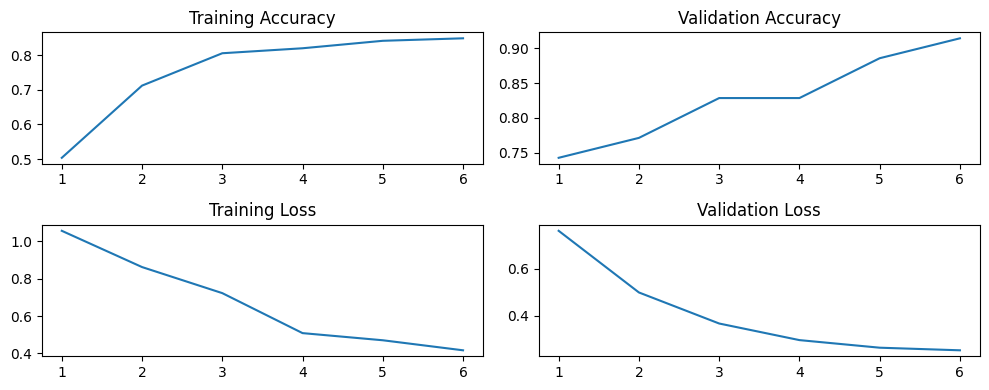

In [74]:
model = Sequential([
    Dense(16, activation='mish', kernel_initializer=HeNormal(seed = 36)),
    Dropout(0.2, seed = 36),
    Dense(1, activation = 'sigmoid', kernel_initializer=HeNormal(seed = 36))
])

model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs = 6
)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 4))
ax[0, 0].plot(range(1, len(accuracy)+1), accuracy, label = 'accuracy')
ax[0, 0].set_title('Training Accuracy')
ax[0, 1].plot(range(1, len(val_accuracy)+1), val_accuracy, label = 'val_accuracy')
ax[0, 1].set_title('Validation Accuracy')

loss = history.history['loss']
val_loss = history.history['val_loss']

ax[1, 0].plot(range(1, len(loss)+1), loss)
ax[1, 0].set_title('Training Loss')
ax[1, 1].plot(range(1, len(val_loss)+1), val_loss)
ax[1, 1].set_title('Validation Loss')

plt.tight_layout()
plt.show()